In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shape: {image.shape}\n"
      f"Image label: {label}")

Image shape: torch.Size([1, 28, 28])
Image label: 9


Text(0.5, 1.0, '9')

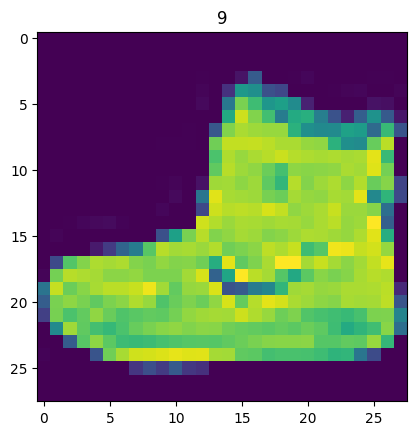

In [9]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title("9")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

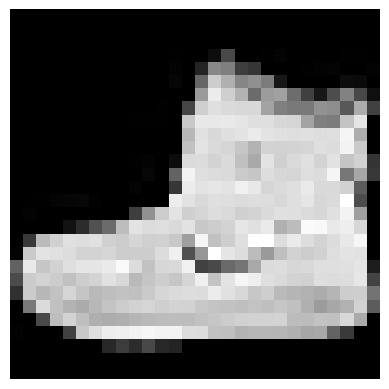

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.axis(False)

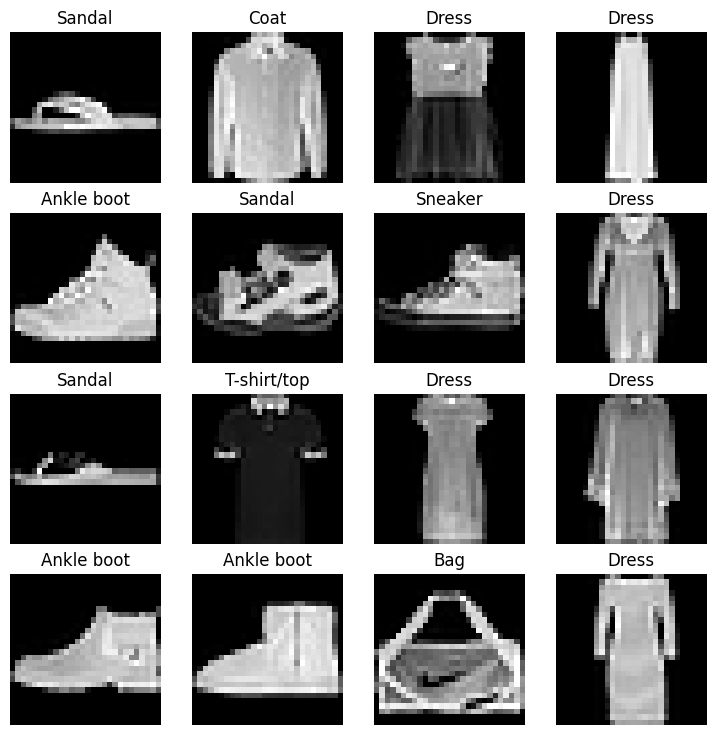

In [11]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(low=0, high=len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7e81cf2f92b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e81cf4a6270>)

In [14]:
print(f"Dataloaders:{train_data_loader,test_data_loader}")
print(f"length of train_data_loader: {len(train_data_loader)} batched of {BATCH_SIZE}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7e81cf2f92b0>, <torch.utils.data.dataloader.DataLoader object at 0x7e81cf4a6270>)
length of train_data_loader: 1875 batched of 32


In [15]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Image label: 2



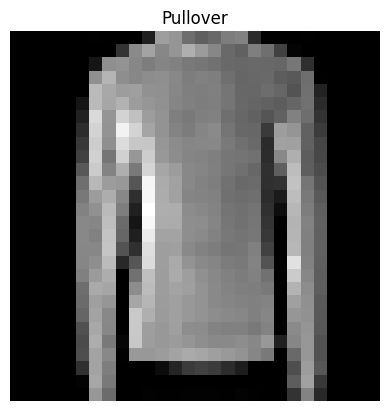

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)
print(f"Image shape: {img.shape}\n"
      f"Image label: {label}\n"
      )

In [17]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)
print(output.squeeze())

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
class FashionMNIST(nn.Module):
    def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)
model_0 = FashionMNIST(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
).to('cpu')
model_0

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_input = torch.randn([1,1,28,28]).to('cpu')
print(model_0(dummy_input))

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)


In [21]:
from helper_functions import *

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [22]:
from tqdm.auto import tqdm


/home/banshee/Personal/Pytorch-tut/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
%%time
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n------")
    train_loss = 0
    for batch, (X,y) in enumerate(train_data_loader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")
    train_loss /= len(train_data_loader.dataset)

    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_data_loader)
        test_acc /=  len(test_data_loader)
    print(f"Test loss: {test_loss:.3f}, test accuracy: {test_acc:.3f}, train loss: {train_loss:.3f}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:09<00:19,  9.82s/it]

Test loss: 0.510, test accuracy: 82.039, train loss: 0.018
epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:15<00:07,  7.50s/it]

Test loss: 0.480, test accuracy: 83.197, train loss: 0.015
epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:21<00:00,  7.22s/it]

Test loss: 0.477, test accuracy: 83.427, train loss: 0.014
CPU times: user 2min, sys: 121 ms, total: 2min
Wall time: 21.7 s


In [24]:
def evaluate(model, data_loader, loss_fn, accuracy_fn,device='cpu'):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_accuracy": acc}

evaluate(model_0, test_data_loader, loss_fn, accuracy_fn)

100%|██████████| 313/313 [00:00<00:00, 413.04it/s]


{'model_name': 'FashionMNIST',
 'model_loss': 0.4766390025615692,
 'model_accuracy': 83.42651757188499}

In [25]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    def forward(self, x):
        return self.layer_stack(x)

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    train_loss, train_acc = 0, 0
    model.train().to(device)
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")

In [29]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.3f}")

In [30]:
%%time
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
    print("Epoch: {}".format(epoch))
    train_step(model_1,
               train_data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device)
    test_step(model_1,
              test_data_loader,
              loss_fn,
              accuracy_fn,
              device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Training loss: 1.092, Training accuracy: 61.343


 33%|███▎      | 1/3 [00:07<00:15,  7.59s/it]

Test loss: 0.956, Test accuracy: 64.996
Epoch: 1
Training loss: 0.781, Training accuracy: 71.928


 67%|██████▋   | 2/3 [00:14<00:07,  7.41s/it]

Test loss: 0.722, Test accuracy: 73.912
Epoch: 2
Training loss: 0.670, Training accuracy: 75.937


100%|██████████| 3/3 [00:22<00:00,  7.45s/it]

Test loss: 0.685, Test accuracy: 75.020
CPU times: user 22 s, sys: 447 ms, total: 22.5 s
Wall time: 22.3 s


In [31]:
evaluate(model_1, test_data_loader, loss_fn, accuracy_fn, device=device)

100%|██████████| 313/313 [00:00<00:00, 403.01it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_accuracy': 75.01996805111821}

## Convolutional Neural Network

In [32]:
class FashionMNISTModelV2(nn.Module):
    """
    Model Architecture that replicates CNN:
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [33]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

In [34]:
torch.manual_seed(42)
images = torch.randn(32, 3, 64,64)
test_image = images[0]
print(images.shape)
print(test_image.shape)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


In [35]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

In [36]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [38]:
%%time
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print("Epoch: {}".format(epoch))
    train_step(model=model_2,
               data_loader=train_data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
               )
    test_step(model=model_2,
              data_loader=test_data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Training loss: 0.598, Training accuracy: 78.283


 33%|███▎      | 1/3 [00:09<00:19,  9.68s/it]

Test loss: 0.401, Test accuracy: 85.563
Epoch: 1
Training loss: 0.365, Training accuracy: 86.870


 67%|██████▋   | 2/3 [00:18<00:09,  9.46s/it]

Test loss: 0.355, Test accuracy: 86.841
Epoch: 2
Training loss: 0.326, Training accuracy: 88.188


100%|██████████| 3/3 [00:29<00:00,  9.78s/it]

Test loss: 0.321, Test accuracy: 88.578
CPU times: user 28.8 s, sys: 466 ms, total: 29.3 s
Wall time: 29.3 s


In [39]:
evaluate(model_2, test_data_loader, loss_fn, accuracy_fn, device=device)

100%|██████████| 313/313 [00:01<00:00, 296.14it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32078197598457336,
 'model_accuracy': 88.57827476038338}

In [40]:
def make_predictions

SyntaxError: expected '(' (3601036881.py, line 1)